# Global Imports

In [5]:
import numpy as np
from qiskit.circuit.library import TwoLocal
import networkx as nx

# Local Imports

In [6]:
from hamiltonians import gen_maxcut_op, get_exact_ground, gen_maxcut_op_from_graph
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, find_k_best_points
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

# Example Experiment

In [7]:
n_qubits = 4
n_mub_qubits = 3
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
op = gen_maxcut_op(n_qubits, edges)
ansatz = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print(exact_result)



     ┌───────┐ ░                 ░ ┌───────┐ ░                 ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐           ░ ├───────┤ ░ ┌─┴─┐           ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤
q_3: ┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░           └───┘ ░ └───────┘ ░           └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])
-4.0


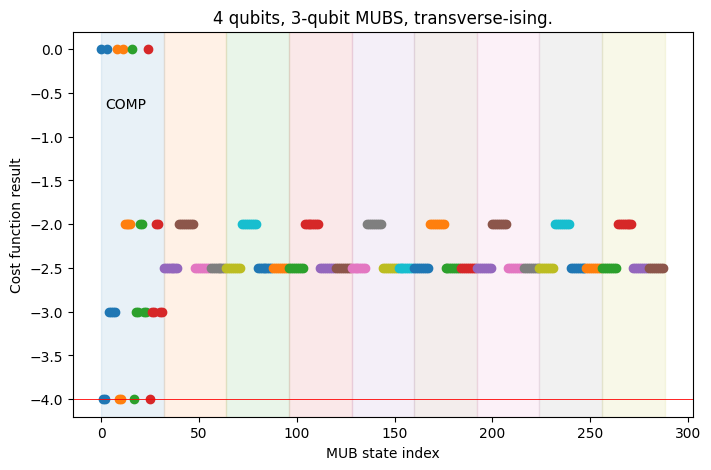

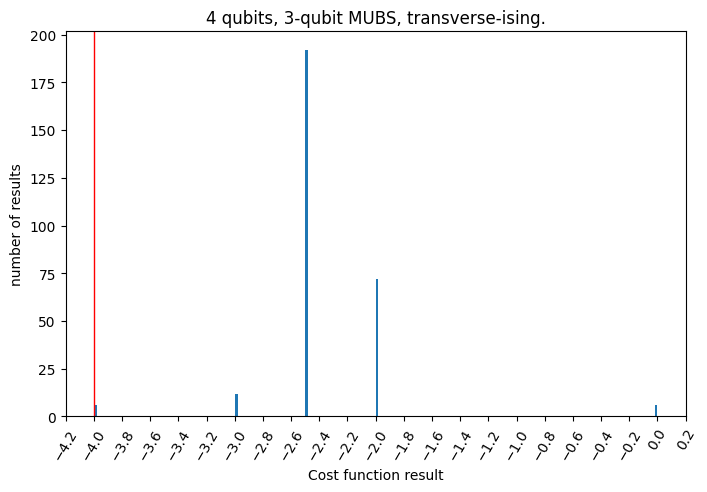

In [8]:
display_energy_landscape(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.")
display_energy_histogram(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

## Combined Example with VQE

Energy Landscape:


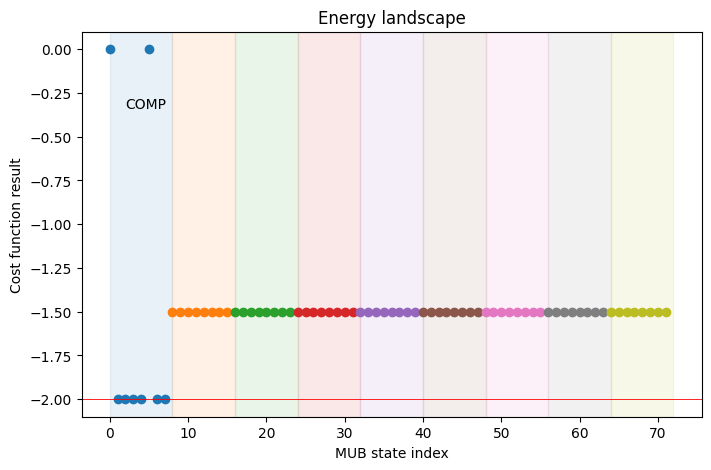

Energy Histogram:


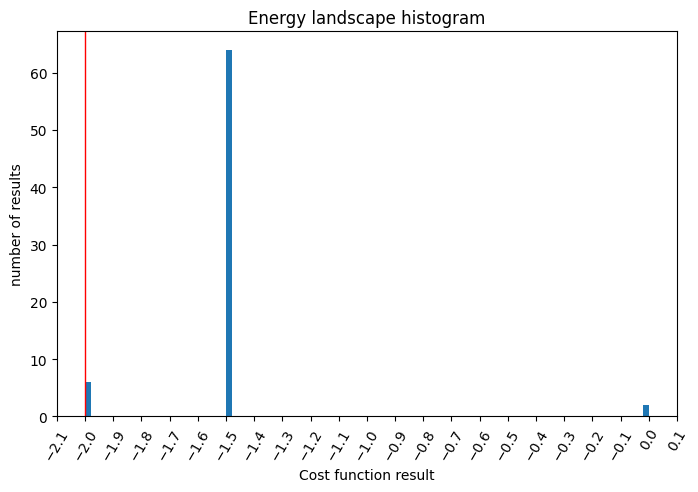

The operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j]) has the exact value -2.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -2.0
(1, -2.0, True)
running from point with value -2.0
(1, -2.0, True)
running from point with value -2.0
(1, -2.0, True)
running from point with value -2.0
(1, -2.0, True)
running from point with value -2.0
(1, -2.0, True)
running from point with value -2.0
(1, -2.0, True)
running from point with value -1.5
(81, -1.9906013697093279, True)
running from point with value -1.5
(52, -1.9949943222505313, True)
running from point with value -1.5
(55, -1.9909786784219272, True)
running from point with value -1.5
100: -1.983472566923588
(106, -1.9933455227976526, True)


In [11]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
edges =[(0,1), (1,2), (2,0)]
op = gen_maxcut_op(n_qubits, edges)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print("Energy Landscape:")
display_energy_landscape(results, exact_result=exact_result)
print("Energy Histogram:")
display_energy_histogram(results, exact_result=exact_result)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=100
params.report_thetas=False

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for _, initial_state_circ, value in find_k_best_points(results, 10):
    print(f"running from point with value {value}")
    try:
        print(run_vqe_experiment(op, ansatz, initial_thetas=None, initial_state_circ=initial_state_circ, params=params))
    except Exception as e:
        print(e)
    

### 4-8 qubit experiments

Energy Landscape:


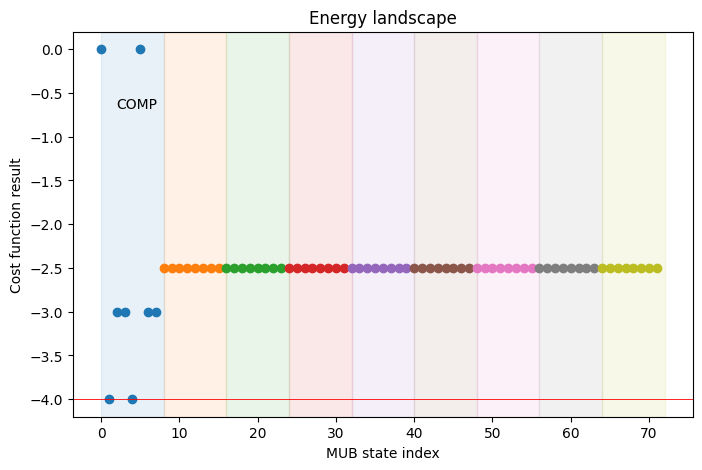

Energy Histogram:


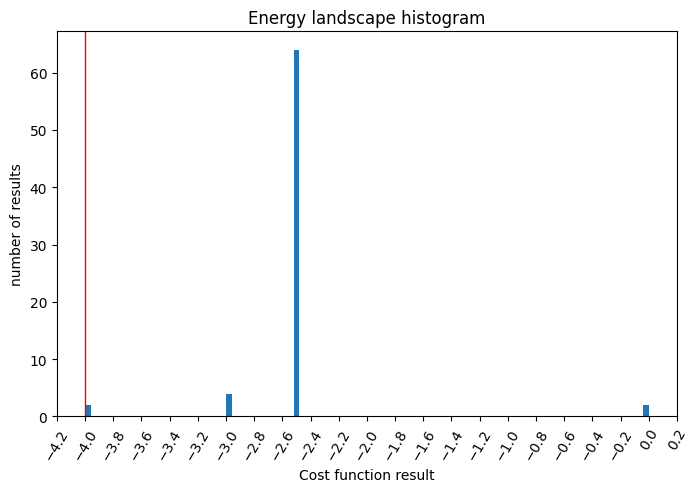

The operator SparsePauliOp(['IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j]) has the exact value -4.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -4.0
(1, -4.0, True)
running from point with value -4.0
(1, -4.0, True)
running from point with value -3.0
100: -3.4506376031286052
200: -3.498797767467299
300: -3.519475367168453
400: -3.628952862273659
500: -3.8234329255276687
600: -3.952014952547282
700: -3.9847386286628597
(734, -3.9900896680342437, True)
running from point with value -3.0
100: -3.316899908711293
200: -3.5733336948342833
300: -3.8670360792415264
400: -3.9534218490774173
500: -3.984810108027461
(566, -3.9901223150043004, True)
running from point with value -3.0
100: -3.323295454586258
200: -3.5530081161050258
300: -3.8897764456785064
400: -3.9645307631208
500: -3.9775557315544887
(503, -3.990070066288402, True)
Energy Landscape:


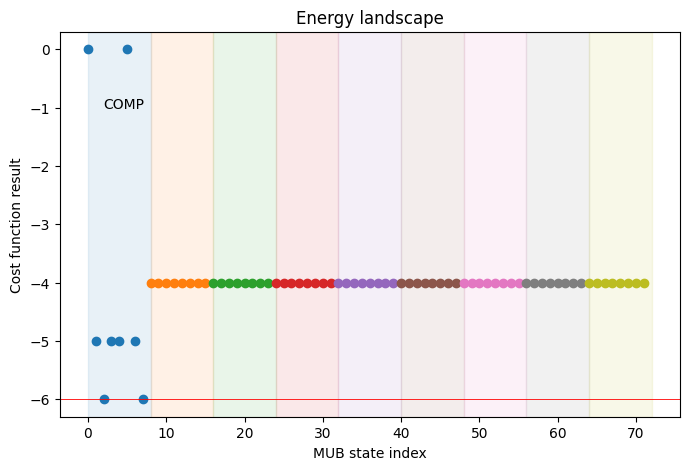

Energy Histogram:


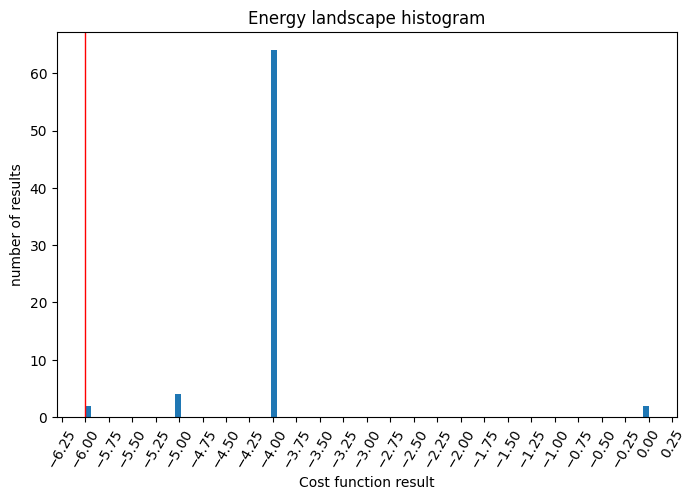

The operator SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'ZIIZI', 'IZZII', 'ZIZII', 'IIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j, -4.5+0.j]) has the exact value -6.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -6.0
(1, -6.0, True)
running from point with value -6.0
(1, -6.0, True)
running from point with value -5.0
100: -5.450348089531632
200: -5.926450678537551
300: -5.950428969769392
(388, -5.990775915192117, True)
running from point with value -5.0
100: -5.8119247751757355
200: -5.933199066384522
300: -5.978556852791002
400: -5.989300951882362
(454, -5.990372051551791, True)
running from point with value -5.0
100: -5.465025730639061
200: -5.883243956191912
300: -5.901595805513779
400: -5.985754012151651
(420, -5.9901702424055205, True)
Energy Landscape:


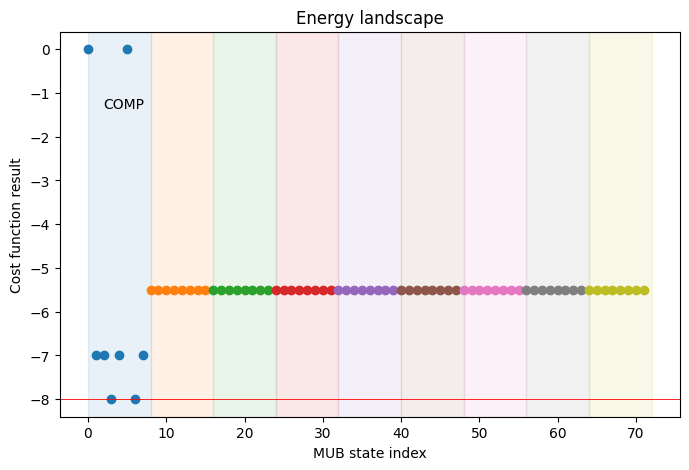

Energy Histogram:


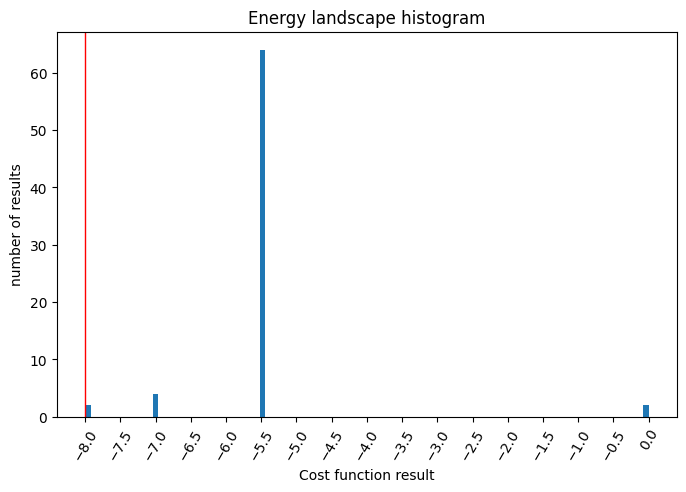

The operator SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIZIIZ', 'ZIIIIZ', 'IIIZZI', 'IIZIZI', 'ZIIIZI', 'IIZZII', 'ZIIZII', 'IZZIII', 'ZIZIII', 'ZZIIII', 'IIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -8.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
(1, -8.0, True)
running from point with value -8.0
(1, -8.0, True)
running from point with value -7.0
100: -7.245240572996064
200: -7.971303550065038
300: -7.971874217180261
400: -7.975072476704713
500: -7.984628757013853
600: -7.986426512646291
(677, -7.99037509774139, True)
running from point with value -7.0
100: -7.262966867540721
200: -7.95769542556475
300: -7.97941635464564
(398, -7.9903132160013435, True)
running from point with value -7.0
100: -7.792142965271365
200: -7.858997744865812
300: -7.891484781317755
400: -7.949850039942156
500: -7.97929272482770

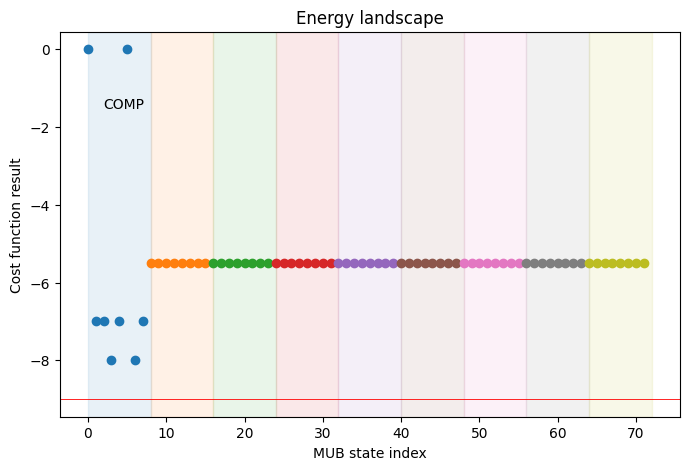

Energy Histogram:


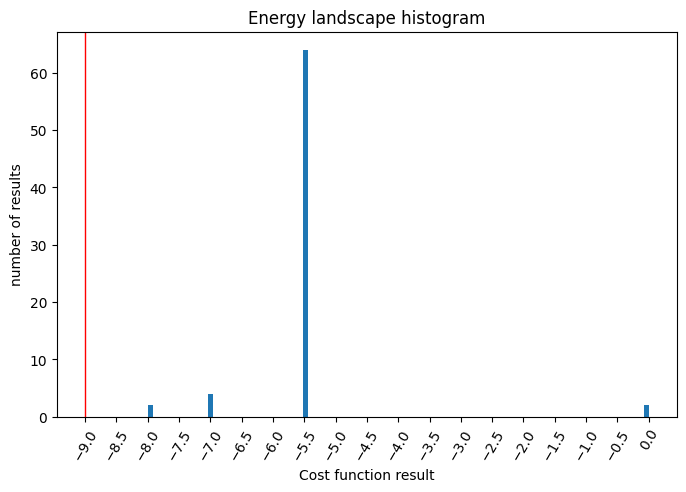

The operator SparsePauliOp(['IIIIIZZ', 'IIIIZIZ', 'IIIZIIZ', 'IIZIIIZ', 'IIIIZZI', 'IIZIIZI', 'IIIZZII', 'IIZIZII', 'IZIIZII', 'IIZZIII', 'IZZIIII', 'ZIZIIII', 'IIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -9.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -8.40530962653057
(168, -8.990293429638868, True)
running from point with value -8.0
100: -8.405986412875745
200: -8.919709594253975
(286, -8.990338167674356, True)
running from point with value -7.0
100: -7.4933130696568035
200: -7.509444353098775
300: -7.756842312655732
400: -7.9130123075174845
500: -7.984041344020059
600: -8.353485701185352
700: -8.618666518107114
800: -8.807523012727076
900: -8.87587148815947
1000: -8.886890604749908
1100: -8.949349911041104
1200: -8.970716815703135
1300: -8.985583908092245
(1352, -8.990779004040023, True)


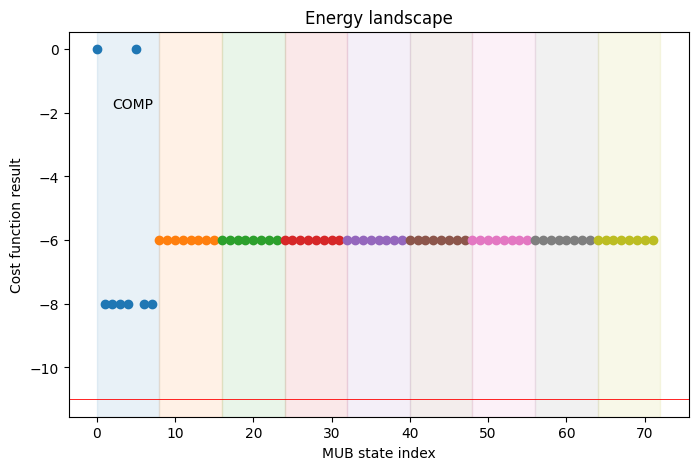

Energy Histogram:


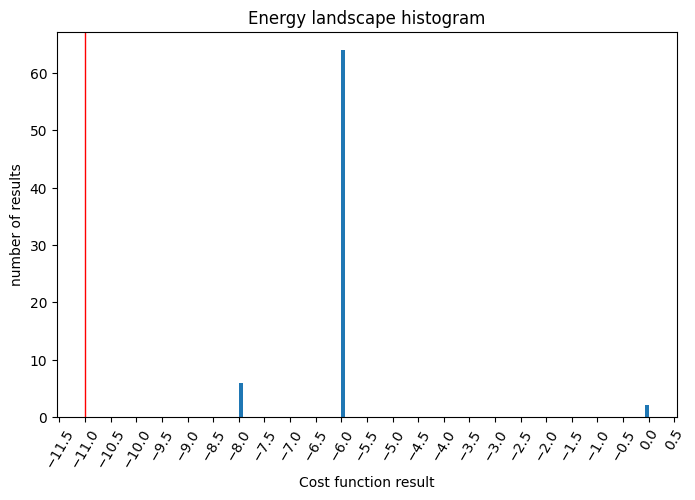

The operator SparsePauliOp(['IIIZIIIZ', 'IIZIIIIZ', 'IZIIIIIZ', 'IIIIIZZI', 'IIIIZIZI', 'IIIZIIZI', 'IZIIIIZI', 'ZIIIIIZI', 'IIIIZZII', 'IIIZIZII', 'IIZIIZII', 'IZIIIZII', 'IIIZZIII', 'IIZZIIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
 -7. +0.j]) has the exact value -11.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -7.415891615307675
200: -8.662840415975221
300: -8.70592181826359
400: -8.898702365717861
500: -9.096668878467645
600: -9.136035687839723
700: -9.26198251290415
800: -9.568377412801079
900: -9.69061479165196
1000: -9.759688697876392
1100: -9.832677398395633
1200: -9.868069330459392
1300: -9.930005825130435
1400: -9.94392980462013
1500: -9.952214270999932
1600: -9.965362300428623
1700: -9.973843984153874
1800: -9.975454803119952
1900: -9.979328039764884
2000: -9.983823352393276
2100: -9.

In [17]:
rand_graph_4 = nx.gnm_random_graph(4, 5)
rand_graph_5 = nx.gnm_random_graph(5, 9)
rand_graph_6 = nx.gnm_random_graph(6, 12)
rand_graph_7 = nx.gnm_random_graph(7, 12)
rand_graph_8 = nx.gnm_random_graph(8, 14)
graphs = [rand_graph_4, rand_graph_5, rand_graph_6, rand_graph_7, rand_graph_8]

for graph in graphs:
    op = gen_maxcut_op_from_graph(graph)
    exact_result = get_exact_ground(op)

    ansatz = TwoLocal(op.num_qubits, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    # calculate landscape and graphs
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 5 examples
    params = get_standard_params(n_qubits)
    params.success_bound = 1e-2
    params.exact_result = exact_result
    params.optimizer = 'COBYLA'
    params.report_period=100
    params.report_thetas=False
    params.max_iter = 3000

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for _, initial_state_circ, value in find_k_best_points(results, 5):
        print(f"running from point with value {value}")
        print(run_vqe_experiment(op, ansatz, initial_thetas=None, initial_state_circ=initial_state_circ, params=params))
    

## Conclusions from the current set of experiments

1. In maxcut, going from a non-ideal state to an ideal state takes a considerable amount of steps.
2. Not necessarily because of a barren plateau - could just be that the optimizer step size was small.
3. To gain clearer insights, we need longer experiments and a clearer indication of progress other than "couldn't reach the goal".